# Interpretable Machine Learning (C45, Ruleset, TAO)

**Data:** https://www.kaggle.com/datasets/iamsouravbanerjee/heart-attack-prediction-dataset
<br>
**License:** OpenAI Usage Policies
<br>
**Data Owner:** User Owned
<br>
**Author:** Lennox Anderson
***

Dependencies

---

In [27]:
pip install imodels

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
import pandas as pd
import numpy as np
from imodels import RuleFitClassifier, DecisionTreeClassifier, C45TreeClassifier, TaoTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, KBinsDiscretizer
from IPython.display import Image, display
from sklearn.metrics import accuracy_score

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
df = pd.read_csv("heart_attack_prediction_dataset.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


## C4.5 rule tree

C45 tends to build larger trees, potentially overfitting, as it keeps splitting based on the feature that provides the highest information gain at each step. It does pruning after the tree is built to reduce overfitting, but the initial tree can be quite large and complex.

In [31]:
pd.set_option('display.max_columns', None)
print(df.head())
pd.reset_option('display.max_columns')

  Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  \
0    BMW7812   67    Male          208         158/88          72         0   
1    CZE1114   21    Male          389         165/93          98         1   
2    BNI9906   21  Female          324         174/99          72         1   
3    JLN3497   84    Male          383        163/100          73         1   
4    GFO8847   66    Male          318          91/88          93         1   

   Family History  Smoking  Obesity  Alcohol Consumption  \
0               0        1        0                    0   
1               1        1        1                    1   
2               0        0        0                    0   
3               1        1        0                    1   
4               1        1        1                    0   

   Exercise Hours Per Week       Diet  Previous Heart Problems  \
0                 4.168189    Average                        0   
1                 1.813242  Unhe

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


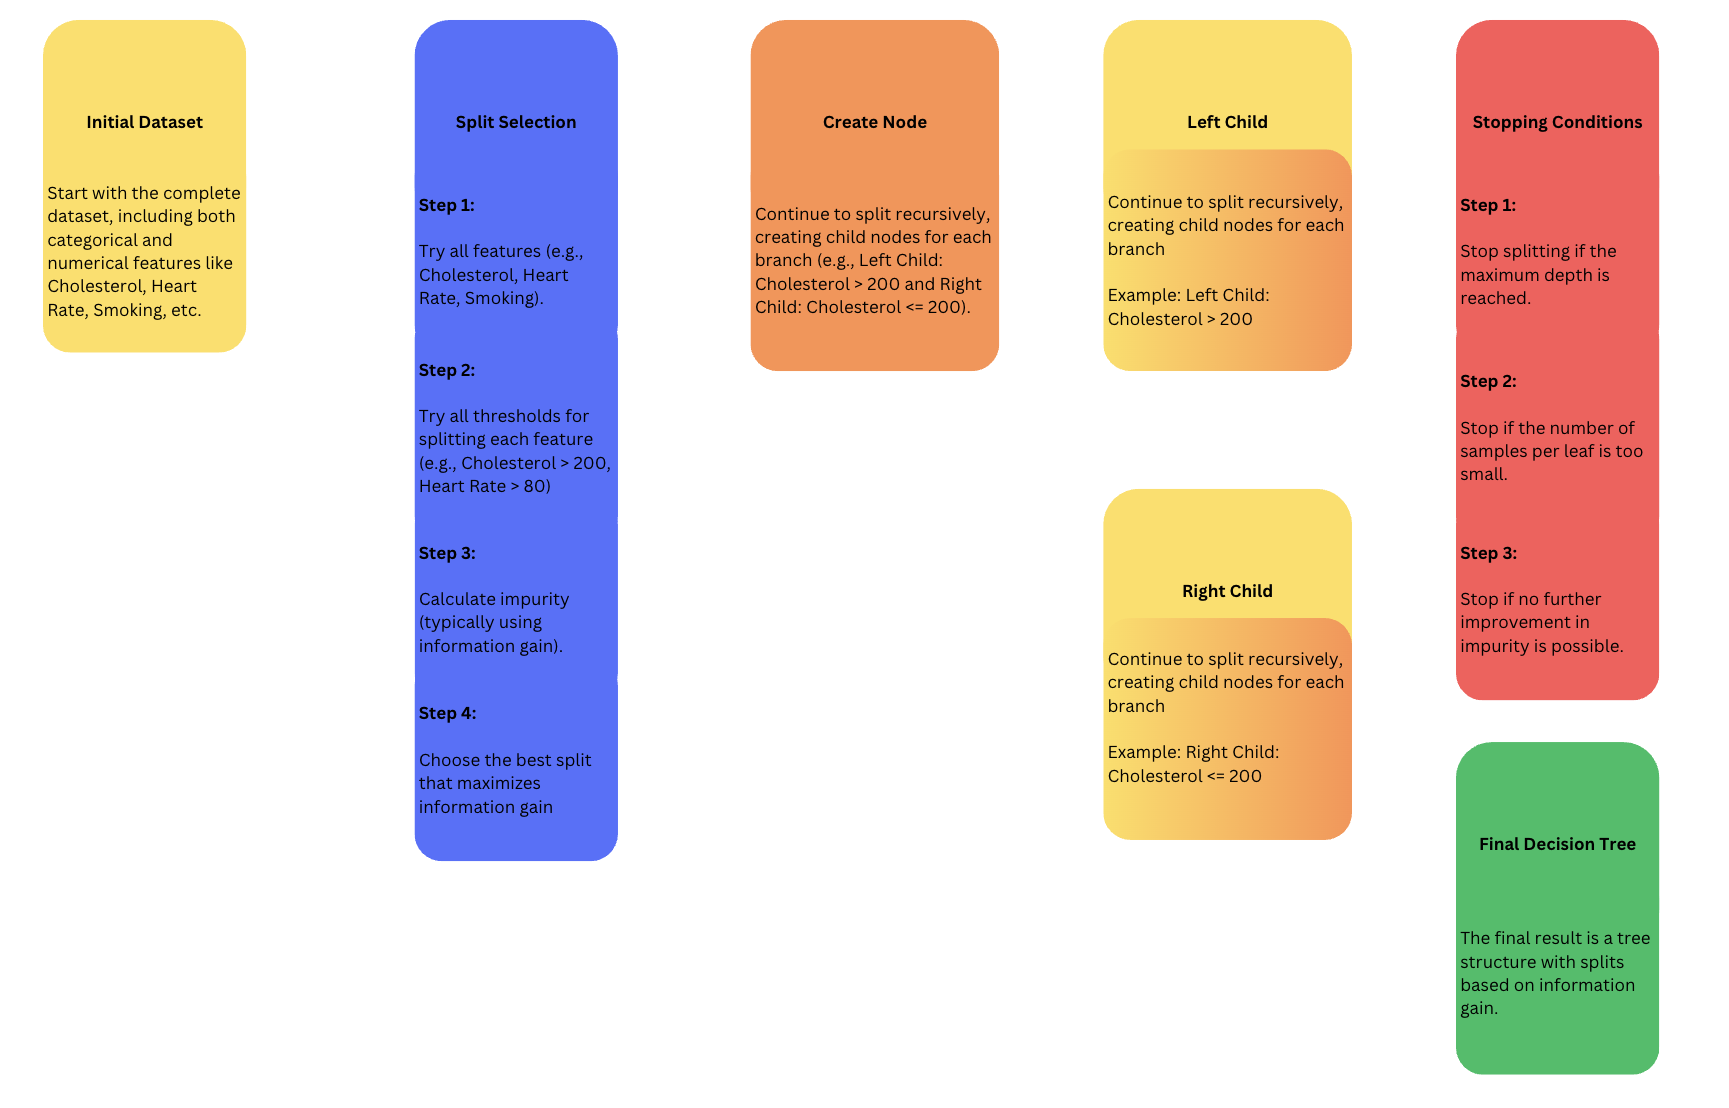

In [32]:
display(Image(filename='c45.png', width=1000, height=600))

In [33]:
selected_features = ['Cholesterol', 'Blood Pressure', 'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet', 'BMI', 'Stress Level']
# new df with selcted features and target
df_selected = df[selected_features + ['Heart Attack Risk']].copy()
# convert to number
label_enc = LabelEncoder()
# encode the categorical features
categorical_cols = ['Blood Pressure', 'Diet']
for col in categorical_cols:
    df_selected.loc[:, col] = label_enc.fit_transform(df_selected[col])
# create bins for continious feature (features that have a infitnite possibilities)
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
numerical_cols = ['Cholesterol', 'Heart Rate', 'Exercise Hours Per Week', 'BMI', 'Stress Level']
df_selected.loc[:, numerical_cols] = discretizer.fit_transform(df_selected[numerical_cols])

X = df_selected.drop('Heart Attack Risk', axis=1)
y = df_selected['Heart Attack Risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# init a c45 model from imodels
c45_model = C45TreeClassifier()
c45_model.fit(X_train, y_train)
y_pred = c45_model.predict(X_test)
tree_accuracy = accuracy_score(y_test, y_pred)
print(f"C45 Tree Accuracy: {tree_accuracy}")
# bins
print(X_train.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C45 Tree Accuracy: 0.537934968625214
      Cholesterol Blood Pressure  Heart Rate  Diabetes  Family History  \
5967            1           1110           1         1               1   
8270            0           1350           2         1               0   
100             1           2742           2         1               0   
3410            2           1767           1         0               0   
1790            1           1996           2         0               1   

      Smoking  Obesity  Alcohol Consumption  Exercise Hours Per Week Diet  \
5967        1        1                    1                      2.0    0   
8270        1        0                    1                      0.0    2   
100         1        0                    1                      0.0    0   
3410        1        0                    1                      2.0    0   
1790        1        1                    1                      0.0    0   

      BMI  Stress Level  
5967  2.0             2  
827

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


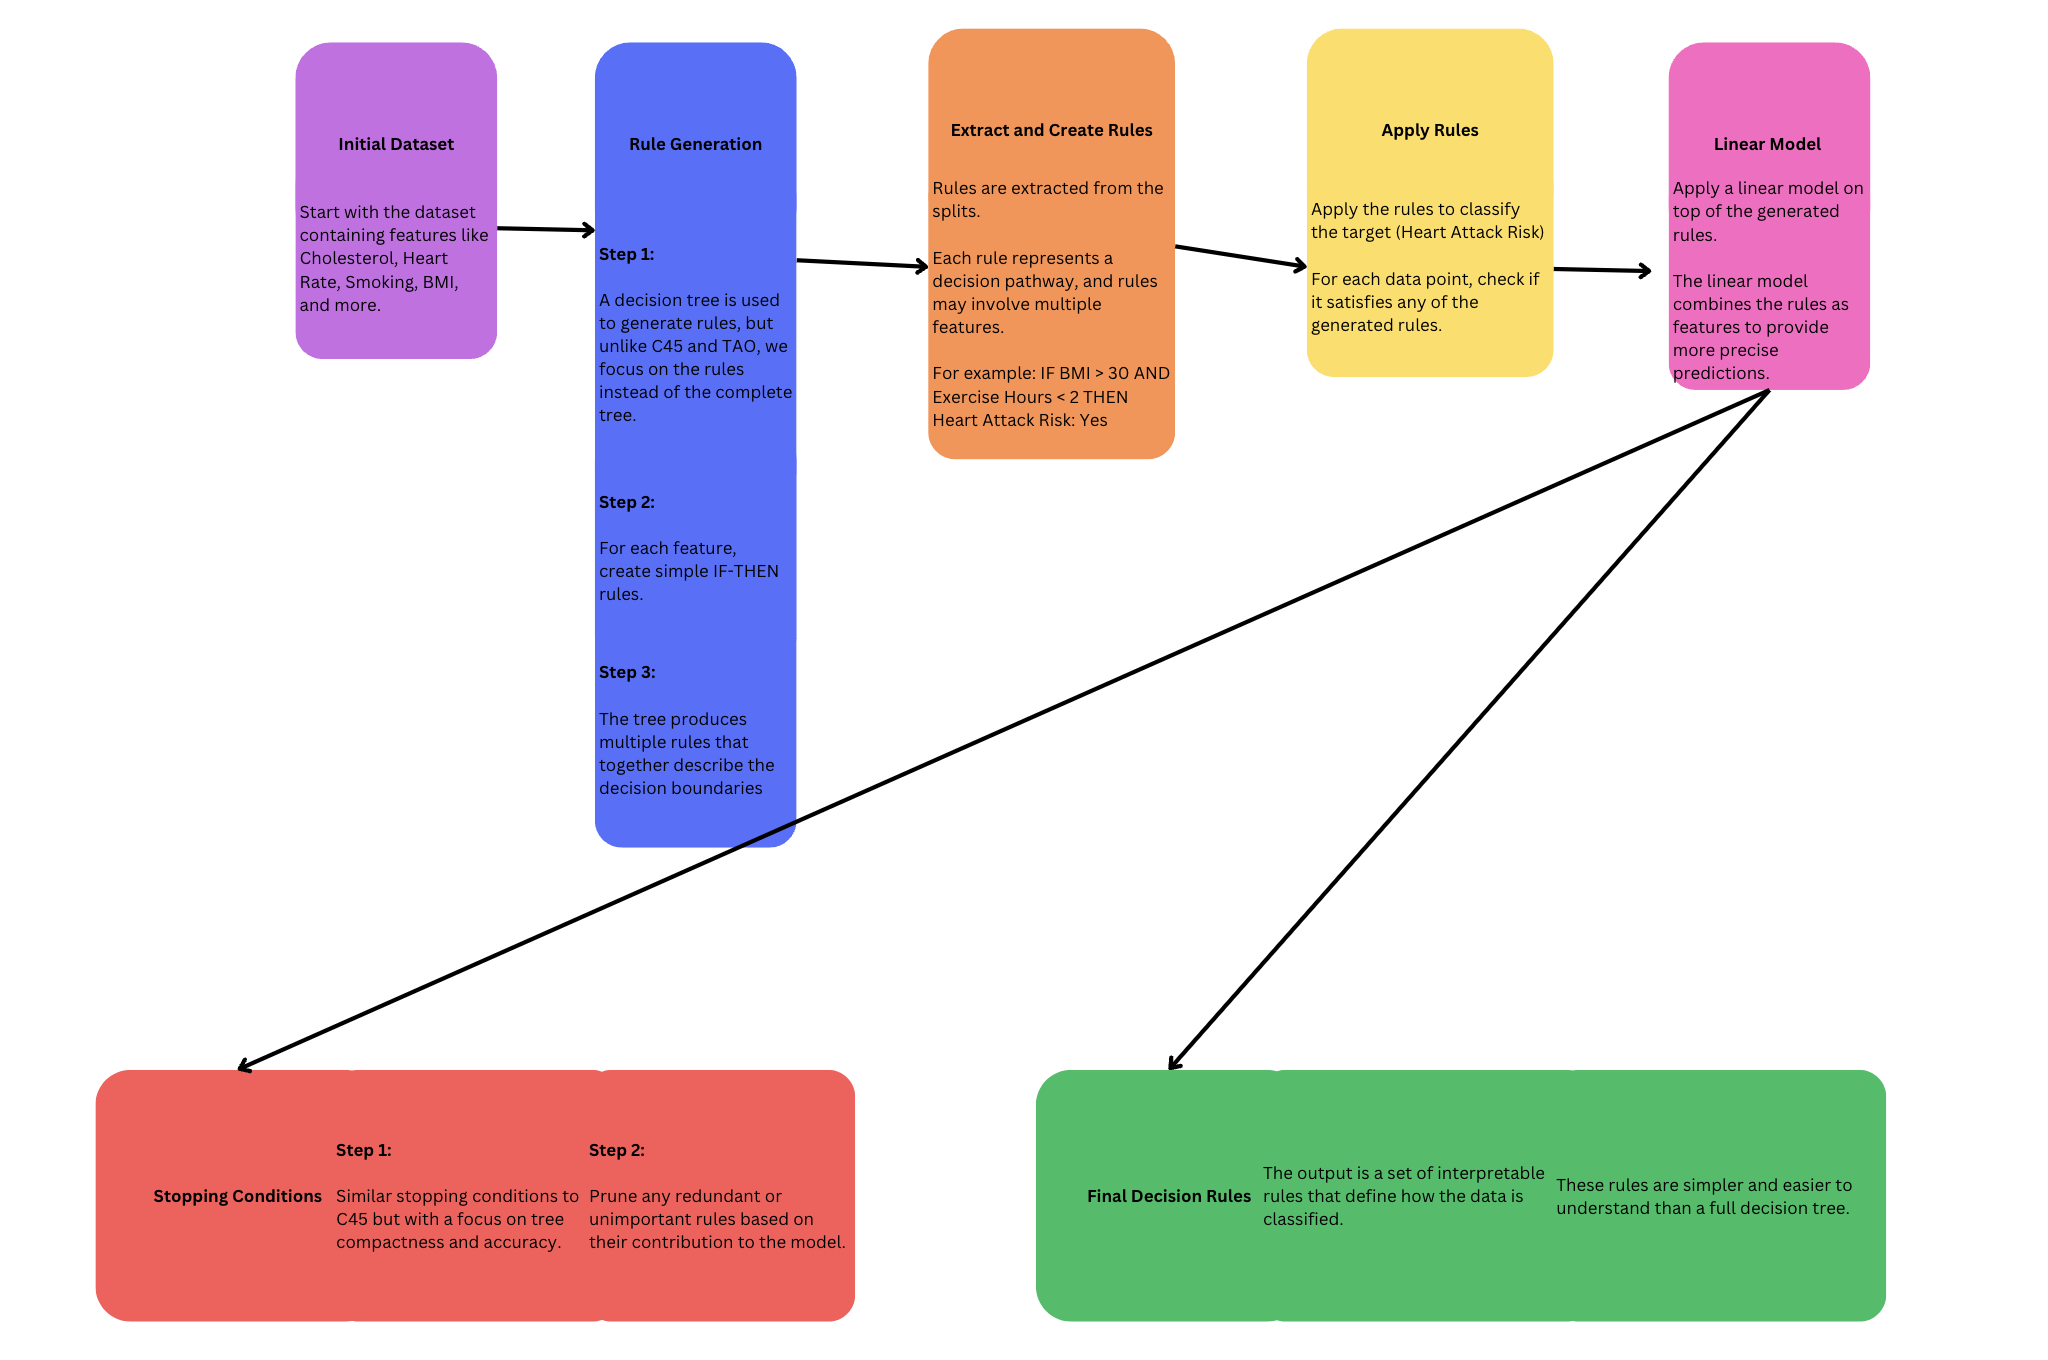

In [34]:
display(Image(filename='ruleset.png', width=1000, height=600))

In [35]:
selected_features = ['Cholesterol', 'Blood Pressure', 'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet', 'BMI', 'Stress Level']
# new df with selcted features and target
df_selected = df[selected_features + ['Heart Attack Risk']].copy()
# convert to number
label_enc = LabelEncoder()
# encode the categorical features
categorical_cols = ['Blood Pressure', 'Diet']
for col in categorical_cols:
    df_selected.loc[:, col] = label_enc.fit_transform(df_selected[col])
# create bins for continious feature (features that have a infitnite possibilities)
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
numerical_cols = ['Cholesterol', 'Heart Rate', 'Exercise Hours Per Week', 'BMI', 'Stress Level']
df_selected.loc[:, numerical_cols] = discretizer.fit_transform(df_selected[numerical_cols])

X = df_selected.drop('Heart Attack Risk', axis=1)
y = df_selected['Heart Attack Risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# init the rule fit from imodels
rulefit_model = RuleFitClassifier()
rulefit_model.fit(X_train, y_train)
y_pred = rulefit_model.predict(X_test)

rulefit_accuracy = accuracy_score(y_test, y_pred)
print(f"RuleFit Classifier Accuracy: {rulefit_accuracy}")
# bins
print(X_train.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RuleFit Classifier Accuracy: 0.6417569880205363
      Cholesterol Blood Pressure  Heart Rate  Diabetes  Family History  \
5967            1           1110           1         1               1   
8270            0           1350           2         1               0   
100             1           2742           2         1               0   
3410            2           1767           1         0               0   
1790            1           1996           2         0               1   

      Smoking  Obesity  Alcohol Consumption  Exercise Hours Per Week Diet  \
5967        1        1                    1                      2.0    0   
8270        1        0                    1                      0.0    2   
100         1        0                    1                      0.0    0   
3410        1        0                    1                      2.0    0   
1790        1        1                    1                      0.0    0   

      BMI  Stress Level  
5967  2.0         

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


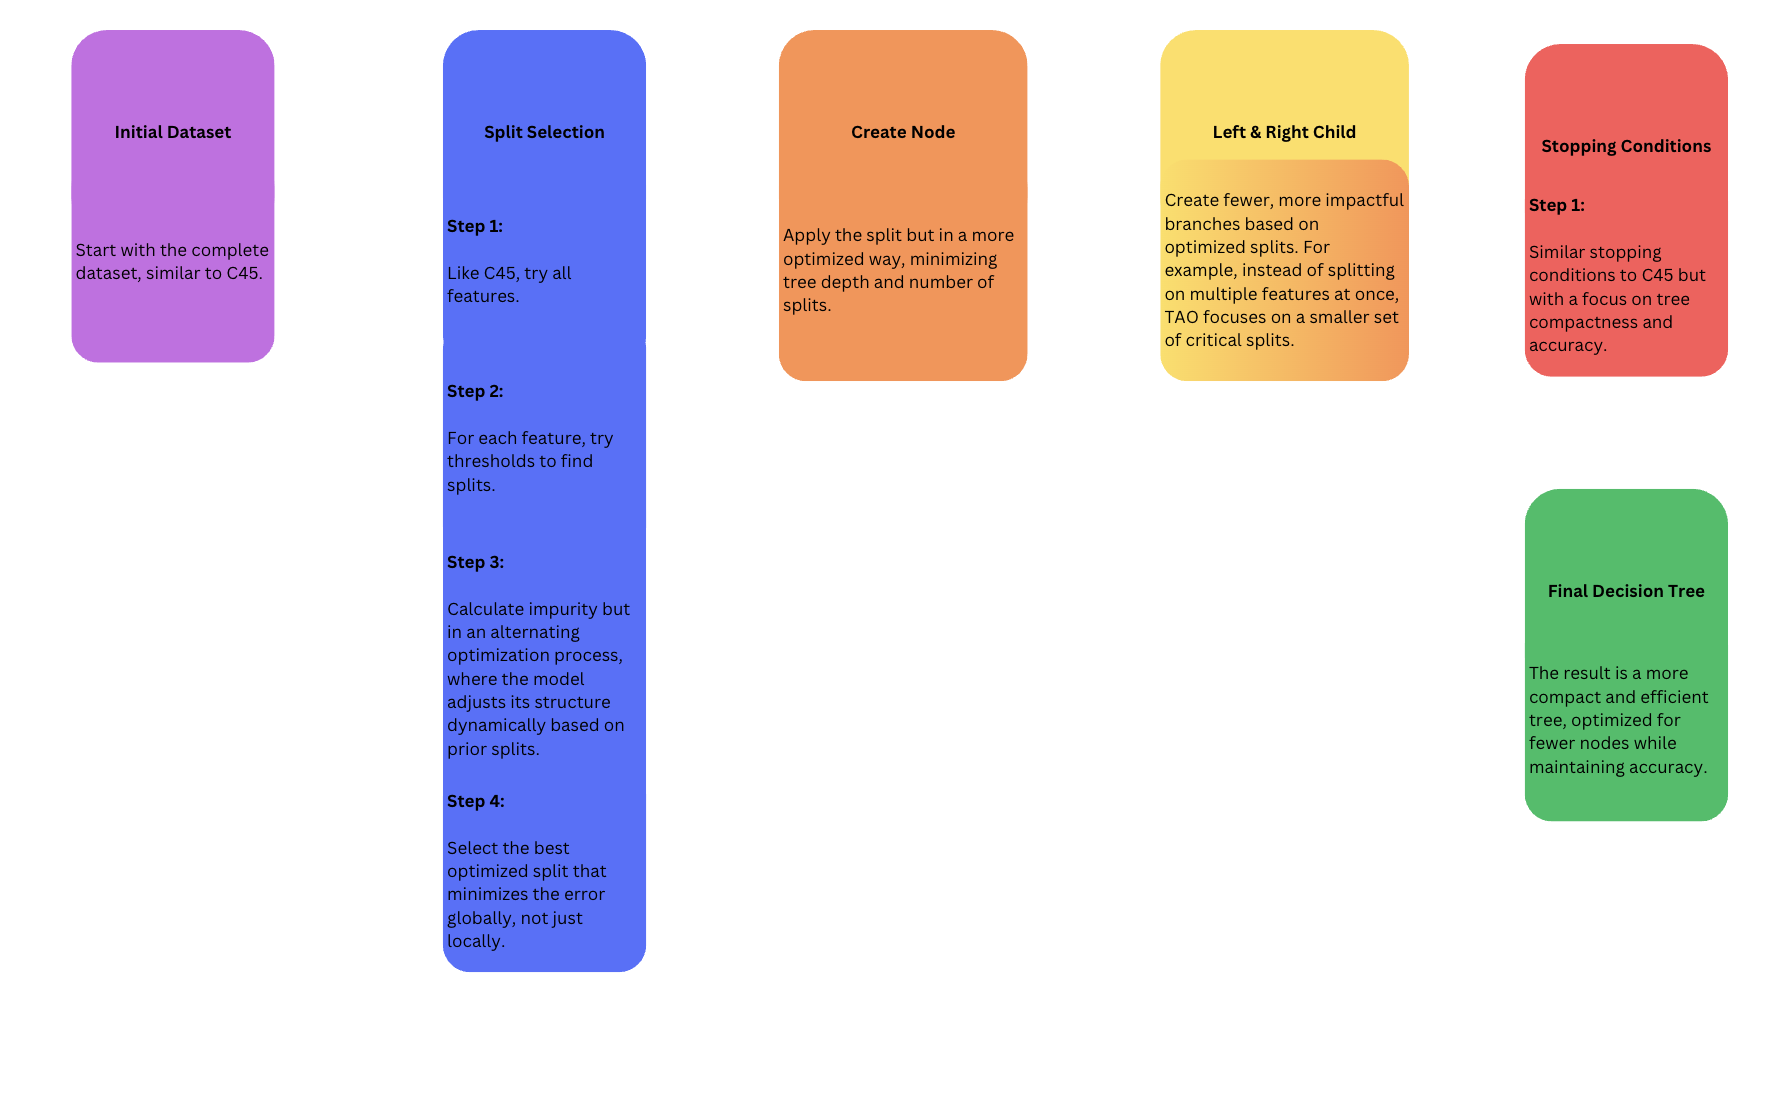

In [36]:
display(Image(filename='tao.png', width=1000, height=600))

In [37]:
selected_features = ['Cholesterol', 'Blood Pressure', 'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet', 'BMI', 'Stress Level']
# new df with selcted features and target
df_selected = df[selected_features + ['Heart Attack Risk']].copy()
# convert to number
label_enc = LabelEncoder()
categorical_cols = ['Blood Pressure', 'Diet']
# encode the categorical features
for col in categorical_cols:
    df_selected.loc[:, col] = label_enc.fit_transform(df_selected[col])
# create bins for continious feature (features that have a infitnite possibilities)
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
numerical_cols = ['Cholesterol', 'Heart Rate', 'Exercise Hours Per Week', 'BMI', 'Stress Level']
df_selected.loc[:, numerical_cols] = discretizer.fit_transform(df_selected[numerical_cols])

X = df_selected.drop('Heart Attack Risk', axis=1)
y = df_selected['Heart Attack Risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# init the tao model from the i models
tao_model = TaoTreeClassifier()
tao_model.fit(X_train, y_train)
y_pred = tao_model.predict(X_test)

tao_accuracy = accuracy_score(y_test, y_pred)
print(f"TAO Tree Accuracy: {tao_accuracy}")
# bins
print(X_train.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


classes_ [0 1] preds [0. 0. 0. ... 0. 0. 0.]
TAO Tree Accuracy: 0.6360524814603536
      Cholesterol Blood Pressure  Heart Rate  Diabetes  Family History  \
5967            1           1110           1         1               1   
8270            0           1350           2         1               0   
100             1           2742           2         1               0   
3410            2           1767           1         0               0   
1790            1           1996           2         0               1   

      Smoking  Obesity  Alcohol Consumption  Exercise Hours Per Week Diet  \
5967        1        1                    1                      2.0    0   
8270        1        0                    1                      0.0    2   
100         1        0                    1                      0.0    0   
3410        1        0                    1                      2.0    0   
1790        1        1                    1                      0.0    0   

      BMI

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
